# Titanic Kaggle Problem
### The Challenge
The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

### In this challenge, we ask you to build a predictive model that answers the question: 
### “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

In this competition, you’ll gain access to two similar datasets that include passenger information like name, age, gender, socio-economic class, etc. One dataset is titled `train.csv` and the other is titled `test.csv`.

Train.csv will contain the details of a subset of the passengers on board (891 to be exact) and importantly, will reveal whether they survived or not, also known as the “ground truth”.

The `test.csv` dataset contains similar information but does not disclose the “ground truth” for each passenger. It’s your job to predict these outcomes.

Using the patterns you find in the train.csv data, predict whether the other 418 passengers on board (found in test.csv) survived.

### 1. Importing Data

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB


In [2]:
train=pd.read_csv("titanic_train.csv")
test=pd.read_csv("titanic_test.csv")

In [3]:
train.shape

(891, 12)

In [4]:
test.shape

(418, 11)

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### 2. Data cleaning and cheacking for null value

In [8]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# Age

#### In "Age" column 177 rows are missing in train data
#### Here we will apply mean value impution to get rid off missing value

In [10]:
n=train["Age"].shape[0]-177
lst=[]
for i in train["Age"]:
    if np.isnan(i):
        continue
    else:
        lst.append(i)

In [11]:
age_sum=0
for i in lst:
    age_sum+=i
print(age_sum)
mean_age=round(age_sum/n,2)
print(mean_age)

21205.17
29.7


In [12]:
for i,age in enumerate(train["Age"]):
    if np.isnan(age):
        train["Age"][i]=mean_age
    else:
        train["Age"][i]=age
    


In [13]:
train["Age"].isnull().sum()

0

### looking for age in test data

In [14]:
n=test["Age"].shape[0]-86
lst=[]
for i in test["Age"]:
    if np.isnan(i):
        continue
    else:
        lst.append(i)

In [15]:
age_sum=0
for i in lst:
    age_sum+=i
print(age_sum)
mean_age=round(age_sum/n,2)
print(mean_age)

10050.5
30.27


In [16]:
for i,age in enumerate(test["Age"]):
    if np.isnan(age):
        test["Age"][i]=mean_age
    else:
        test["Age"][i]=age
    


In [17]:
test["Age"].isnull().sum()

0

#### cabin 

In [18]:
train_test_data = [train, test] 

In [19]:
train.Cabin.value_counts()

G6             4
C23 C25 C27    4
B96 B98        4
D              3
F2             3
              ..
C111           1
A36            1
F38            1
E68            1
D56            1
Name: Cabin, Length: 147, dtype: int64

In [20]:
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].str[:1]

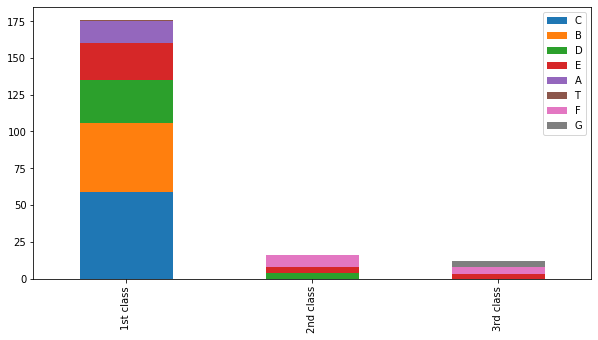

In [21]:

Pclass1 = train[train['Pclass']==1]['Cabin'].value_counts()

Pclass2 = train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train[train['Pclass']==3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [22]:
cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8}
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

In [23]:
# fill missing Fare with median fare for each Pclass
train["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
test["Cabin"].fillna(test.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

In [24]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

In [25]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin          0
Embarked       0
dtype: int64

### tring to fill the null value in Embarked in train data

In [26]:
count_c=0
count_q=0
count_s=0
for i in train["Embarked"]:
    if i=="C":
        count_c+=1
    elif i=="Q":
        count_q+=1
    else:
        count_s+=1

In [27]:
print(count_c)
print(count_q)
print(count_s)

168
77
646


#### Highest number of people embarked from Southampton 
#### so i will fill null value in train["Embarked"] with Southampton or"S"

In [28]:
for i,boool in enumerate(train["Embarked"].isnull()):
    if boool==True:
        train["Embarked"][i]="S"
        

In [29]:
train["Embarked"].isnull().sum()

0

#### finally trying to see that is there any null value is present?

In [30]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

### Trying to do the same for test data

In [31]:
test.shape

(418, 11)

In [32]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin          0
Embarked       0
dtype: int64

#### 1 value is missing in "Fare" column ,i will apply mean value imputation here also.

In [33]:
summ=test["Fare"].sum()
size=test["Fare"].shape[0]-1
#for i in train["Fare"]:
#    if np.isnan():
mean=summ/size
for i,fare in enumerate(test["Fare"]):
    if np.isnan(fare):
        test["Fare"][i]=mean
        

In [34]:
test["Fare"].isnull().sum()

0

In [35]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [36]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,2.0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,0.8,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,2.0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,0.8,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,2.0,S


## Converting  "Name" column  as title column

#Title map
#Mr : 0
#Miss : 1
#Mrs: 2
#Others: 3

In [37]:
train["Name"].value_counts()

Johnson, Miss. Eleanor Ileen                                     1
Yasbeck, Mrs. Antoni (Selini Alexander)                          1
Cunningham, Mr. Alfred Fleming                                   1
Hassab, Mr. Hammad                                               1
Strom, Mrs. Wilhelm (Elna Matilda Persson)                       1
                                                                ..
Oreskovic, Miss. Marija                                          1
Strom, Miss. Telma Matilda                                       1
Brown, Mrs. Thomas William Solomon (Elizabeth Catherine Ford)    1
Hakkarainen, Mrs. Pekka Pietari (Elin Matilda Dolck)             1
Beavan, Mr. William Thomas                                       1
Name: Name, Length: 891, dtype: int64

In [38]:
train_test_data = [train, test] # combining train and test dataset

for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [39]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

In [40]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,2.0,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,0.8,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,2.0,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,0.8,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,2.0,S,0


#### "Tickect" column is not so informative ,so i will drop it.

In [41]:
train=train.drop(["Name","Ticket"],axis=1)

In [42]:
test=test.drop(["Name","Ticket"],axis=1)

In [43]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,7.2500,2.0,S,0
1,2,1,1,female,38.0,1,0,71.2833,0.8,C,2
2,3,1,3,female,26.0,0,0,7.9250,2.0,S,1
3,4,1,1,female,35.0,1,0,53.1000,0.8,S,2
4,5,0,3,male,35.0,0,0,8.0500,2.0,S,0


In [44]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,892,3,male,34.5,0,0,7.8292,2.0,Q,0
1,893,3,female,47.0,1,0,7.0000,2.0,S,2
2,894,2,male,62.0,0,0,9.6875,2.0,Q,0
3,895,3,male,27.0,0,0,8.6625,2.0,S,0
4,896,3,female,22.0,1,1,12.2875,2.0,S,2


#### 'SEX' column, male=0,Female=1

In [45]:
for i,gen in enumerate(train["Sex"]):
    if gen=="male":
        train["Sex"][i]=0
    else:
        train["Sex"][i]=1
        

In [46]:
for i,gen in enumerate(test["Sex"]):
    if gen=="male":
        test["Sex"][i]=0
    else:
        test["Sex"][i]=1
        

In [47]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,7.2500,2.0,S,0
1,2,1,1,1,38.0,1,0,71.2833,0.8,C,2
2,3,1,3,1,26.0,0,0,7.9250,2.0,S,1
3,4,1,1,1,35.0,1,0,53.1000,0.8,S,2
4,5,0,3,0,35.0,0,0,8.0500,2.0,S,0


In [48]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,892,3,0,34.5,0,0,7.8292,2.0,Q,0
1,893,3,1,47.0,1,0,7.0000,2.0,S,2
2,894,2,0,62.0,0,0,9.6875,2.0,Q,0
3,895,3,0,27.0,0,0,8.6625,2.0,S,0
4,896,3,1,22.0,1,1,12.2875,2.0,S,2


### in embarked column,putting S=0,C=1,Q=2

In [49]:
for i,classs in enumerate(train["Embarked"]):
    if classs=="S":
        train["Embarked"][i]=0
    elif classs=="C":
        train["Embarked"][i]=1
    else:
        train["Embarked"][i]=2
        
        

In [50]:
for i,classs in enumerate(test["Embarked"]):
    if classs=="S":
        test["Embarked"][i]=0
    elif classs=="C":
        test["Embarked"][i]=1
    else:
        test["Embarked"][i]=2
        

In [51]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,7.2500,2.0,0,0
1,2,1,1,1,38.0,1,0,71.2833,0.8,1,2
2,3,1,3,1,26.0,0,0,7.9250,2.0,0,1
3,4,1,1,1,35.0,1,0,53.1000,0.8,0,2
4,5,0,3,0,35.0,0,0,8.0500,2.0,0,0


In [52]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,892,3,0,34.5,0,0,7.8292,2.0,2,0
1,893,3,1,47.0,1,0,7.0000,2.0,0,2
2,894,2,0,62.0,0,0,9.6875,2.0,2,0
3,895,3,0,27.0,0,0,8.6625,2.0,0,0
4,896,3,1,22.0,1,1,12.2875,2.0,0,2


## Data Analysis

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
def graph(var):
    
    
    sns.countplot(x =var,hue='Survived', data = train)
    plt.show()

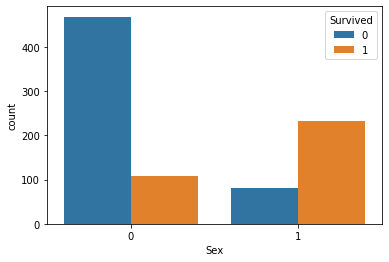

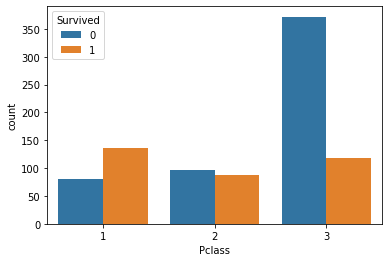

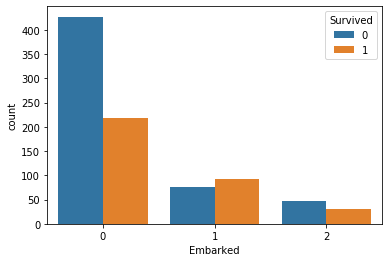

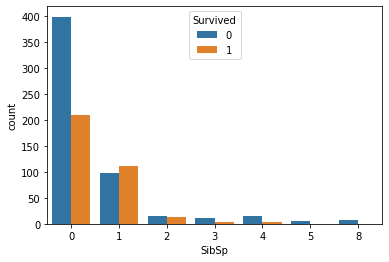

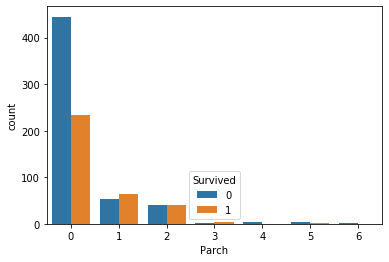

In [55]:
variables=['Sex','Pclass','Embarked','SibSp','Parch']
for i in variables:
    
    graph(i)

##### Observation from above graph:-
#####   -->Number of survival of Female is higher than Number of survival of male.
#####   -->Pclass 1 have higher Number of survival then others.
#####   -->Number of survival of people from Southampton is higher than others.
#####   -->Number of survival is more who have very few siblings.
#####   -->Number of survival of people having no parents / children on the Titanic is higher then others.

## correlation between the numeric variables

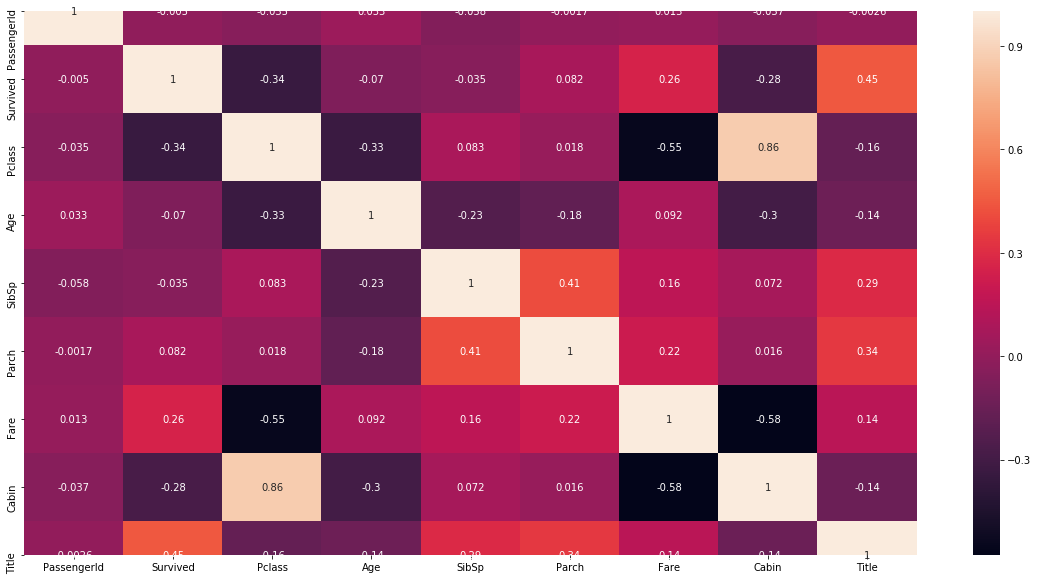

In [56]:
#Finding the correlation between the numeric variables
plt.figure(figsize = (20,10))
sns.heatmap(train.corr(),annot = True)
plt.show()

#### parch is very less correlated to survived,we may ignore it.

## Train and Test splite of dataset

In [57]:
X=train.drop('Survived', axis=1)

In [58]:
y=train["Survived"]

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)

## Confusion Matrix

In [61]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
   
    
   
    
    
    labels = [0,1]
    
    
    print("-"*20, "Confusion matrix", "-"*20)
    plt.figure(figsize=(5,5))
    sns.heatmap(C, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

# Trying to calculate accuracy score using different models

## 1.Stochastic Gradient Descent (SGD):

-------------------- Confusion matrix --------------------


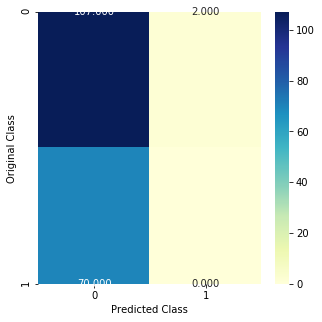

In [62]:
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, y_train)

#score(X_train,Y_train) is measuring the accuracy of the model against the training data.
#(How well the model explains the data it was trained with).
#But note that this has nothing to do with test data. 
preds = sgd.predict(X_test)


# confusion_matrix
plot_confusion_matrix(y_test, preds)

In [63]:

accuracy_sgd = round(sgd.score(X_test, y_test) * 100, 2) # Return the mean accuracy on the given test data and labels
 

In [64]:
print(accuracy_sgd )

59.78


## 2. KNN

In [65]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


In [66]:
clf= KNeighborsClassifier(n_neighbors=13)
clf.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform')

-------------------- Confusion matrix --------------------


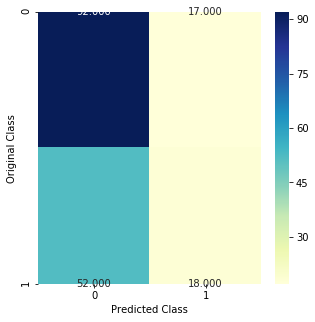

In [67]:
preds = clf.predict(X_test)


# confusion_matrix
plot_confusion_matrix(y_test, preds)

In [68]:
accuracy_knn= round(clf.score(X_test, y_test) * 100, 2)

In [69]:
print(accuracy_knn)

61.45


In [70]:
from xgboost import XGBClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from scipy.sparse import hstack


warnings.filterwarnings("ignore")
import pickle
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression

## 3. logistic regression

In [71]:
clf=LogisticRegression()

clf.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

-------------------- Confusion matrix --------------------


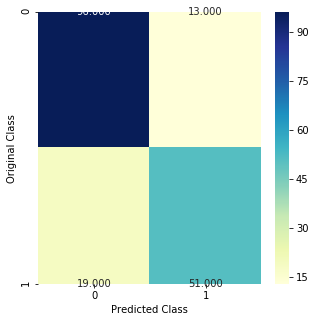

In [72]:
preds = clf.predict(X_test)


# confusion_matrix
plot_confusion_matrix(y_test, preds)

In [73]:

accuracy_logistic= round(clf.score(X_test, y_test) * 100, 2)
print(accuracy_logistic)

82.12


## 4.Naive Baise

In [74]:
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score
import math

In [75]:
from sklearn.model_selection import GridSearchCV
clf= MultinomialNB()

clf.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

-------------------- Confusion matrix --------------------


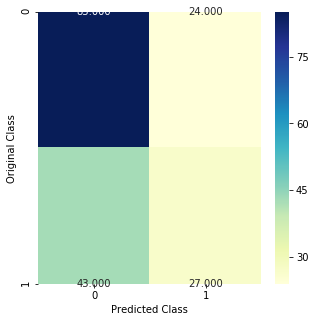

In [76]:
preds = clf.predict(X_test)


# confusion_matrix
plot_confusion_matrix(y_test, preds)

In [77]:
accuracy_naive= round(clf.score(X_test, y_test) * 100, 2)
print(accuracy_naive)

62.57


## 5. Decision Tree

In [78]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [79]:
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

-------------------- Confusion matrix --------------------


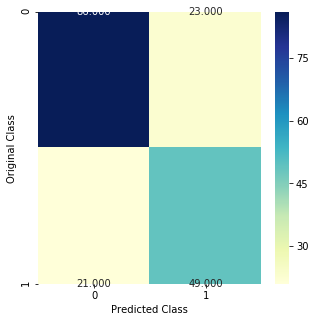

In [80]:
preds = clf.predict(X_test)


# confusion_matrix
plot_confusion_matrix(y_test, preds)

In [81]:
accuracy_dec= round(clf.score(X_test, y_test) * 100, 2)
print(accuracy_dec)

75.42


## 6.RandomForest

In [82]:
clf = RandomForestClassifier(n_estimators=13)
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=13,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

-------------------- Confusion matrix --------------------


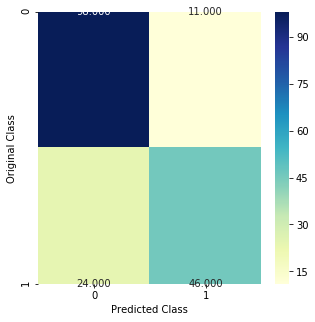

In [83]:
preds = clf.predict(X_test)


# confusion_matrix
plot_confusion_matrix(y_test, preds)

In [84]:
accuracy_rf= round(clf.score(X_test, y_test) * 100, 2)
print(accuracy_rf)

80.45


# 7.Svm

In [85]:
clf = SVC()
clf.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

-------------------- Confusion matrix --------------------


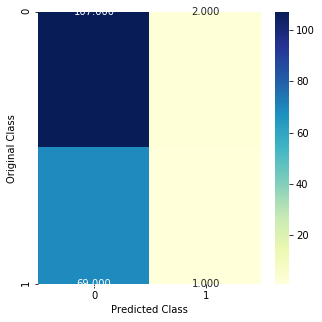

In [86]:
preds = clf.predict(X_test)


# confusion_matrix
plot_confusion_matrix(y_test, preds)

In [87]:
accuracy_svm= round(clf.score(X_test, y_test) * 100, 2)
print(accuracy_svm)

60.34


# selecting best model based on score value

In [88]:
results = pd.DataFrame({
    'Model': ['SGD', 'KNN', 'Logistic Regression', 
              'Naive Baise', 'Decision Tree', 'Random forest', 
              'SVM' 
              ],
    'Score': [accuracy_sgd , accuracy_knn, accuracy_logistic, 
              accuracy_naive,accuracy_dec,
              accuracy_rf, accuracy_svm]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
82.12,Logistic Regression
80.45,Random forest
75.42,Decision Tree
62.57,Naive Baise
61.45,KNN
60.34,SVM
59.78,SGD


#### Based on above score value ,i come to conculusion that logistic regression is the best on basis of accuracy

In [89]:
from sklearn.model_selection import cross_val_score
lg=LogisticRegression()
scores = cross_val_score(lg, X_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.80555556 0.73611111 0.83098592 0.77464789 0.84507042 0.84507042
 0.84507042 0.81690141 0.81690141 0.87323944]
Mean: 0.8189553990610328
Standard Deviation: 0.037618876399422144


In [98]:
lg.fit(X_train,y_train) #Training my decision Tree on Train data
lst=[]
for i in lg.coef_:
    for j in i:
        
        lst.append(j)
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(lst,1)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)
#print(lst)

,importance
feature,
Sex,2.0
Title,0.6
Cabin,0.3
Embarked,0.3
PassengerId,0.0
Age,-0.0
Fare,0.0
Parch,-0.3
SibSp,-0.4


### By looking at Feature importance value we can conclude that "SibSp" and "Parch" are not so important feature.

#### So i will drop there to column

In [99]:
train=train.drop(["SibSp","Parch"],axis=1)

In [100]:
test=test.drop(["SibSp","Parch"],axis=1)

## Again Traing my model on only important feature

In [101]:
X=train.drop('Survived', axis=1)
y=train["Survived"]



In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)

In [103]:
# logistic reg

lg=LogisticRegression()
lg.fit(X_train, y_train)




acc_random_forest = round(lg.score(X_test, y_test) * 100, 2)
print(round(acc_random_forest,2,), "%")

79.33 %


# Hyperparameter Tunning 

In [104]:
from sklearn.model_selection import RandomizedSearchCV, cross_val_score

In [105]:
lr =LogisticRegression()
prams={'C':[10**i for i in range(-4,5)]}
random_clf = RandomizedSearchCV(lr,prams,scoring='neg_log_loss',cv=5,n_jobs=-1)
random_clf.fit(X_train,y_train)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='warn', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='warn', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='warn', n_iter=10, n_jobs=-1,
                   param_distributions={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10,
                                              100, 1000, 10000]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring='

In [107]:
random_clf.best_params_

{'C': 1}

In [109]:
lr=LogisticRegression(C=1)
lr.fit(X_train, y_train)
accuracy_dec= round(lr.score(X_test, y_test) * 100, 2)
print(accuracy_dec)

79.33


In [110]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(lr, X_train, y_train, cv=3)
confusion_matrix(y_train, predictions)

array([[369,  68],
       [ 73, 202]], dtype=int64)

In [111]:
from sklearn.metrics import precision_score, recall_score

print("Precision:", precision_score(y_train, predictions))
print("Recall:",recall_score(y_train, predictions))

Precision: 0.7481481481481481
Recall: 0.7345454545454545


In [112]:
from sklearn.metrics import f1_score
f1_score(y_train, predictions)

0.7412844036697247

# ROC_Score

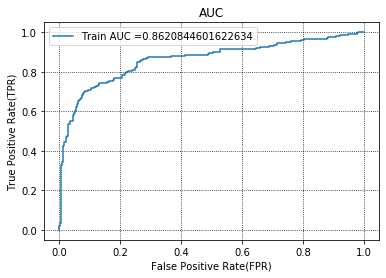

In [113]:
from sklearn.metrics import roc_curve, auc

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred=lr.predict_proba(X_train)[:,1]
# y_test_pred = batch_predict(clf, x_test_onehot_bow)
#y_test_pred=dt.predict_proba(X_test)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
#test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

ax = plt.subplot()

auc_set2_train=auc(train_fpr, train_tpr)
#auc_set2_test=auc(test_fpr, test_tpr)


ax.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
#ax.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("AUC")
plt.grid(b=True, which='major', color='k', linestyle=':')
ax.set_facecolor("white")
plt.show()


#### Train_Auc of logistic regression model is very High therefore i will choose logistic regression as our prediction model

#### I think that score is good enough to submit the predictions for the test-set to the Kaggle leaderboard.

In [114]:



predicted= lr.predict(test)

print(predicted)


[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 0 1 0 0 0 0 0 1 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 1 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 1
 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 1 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0
 0 1 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1
 0 1 0 1 0 0 0 0 0 1 0 1 1 0 1 1 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 1 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


In [115]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": predicted
    })



In [116]:

submission.head()


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
